In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import shutil

In [3]:
ca.set_log_level('INFO')

In [4]:
%matplotlib inline

In [5]:
pwd

'/Users/amnon/git/paper-metaanalysis/scripts'

In [6]:
pd.__version__

'1.2.5'

In [7]:
from os.path import join
save_dir = '../ratios/'

In [8]:
data=ca.read_amplicon('../studies/22/all.biom','../studies/22/up.map.csv',normalize=10000,min_reads=1000)


2022-01-02 16:16:46 INFO loaded 144 samples, 2687 features
2022-01-02 16:16:46 WARNING Do you forget to normalize your data? It is required before running this function
2022-01-02 16:16:46 INFO After filtering, 144 remain.


In [9]:
np.mean(data.sample_metadata._calour_original_abundance)

58202.34027777778

# Create a table with mean, std and median of number of reads per sample for each study

In [10]:
def count_reads(out_file,rarefaction_depths):
    '''Count the reads for each sample in each cohort and save the mean, median and std
    
    Parameters
    ----------
    out_file:str
        name of the output tsv file
    rarefaction_depths: list of int
        the rarefactions to test
    '''
    cols = ['cohort','mean','median','std','num_samples','num_HC','num_disease']
    for crare in rarefaction_depths:
        cols.append('num_rare_%d' % crare)
    df=pd.DataFrame(columns=cols)
    out_file = join(save_dir,out_file)

    num_processed = 0
    for cname in glob.glob('../studies/*'):
        if os.path.isdir(cname):
            print('**********')
            print(cname)
            tables = glob.glob(os.path.join(cname,'all.*biom'))
            print(tables)
            if len(tables)==0:
                print('dir %s does not contain a biom table' % cname)
                continue
            bt=tables[0]
            data=ca.read_amplicon(os.path.join(bt),os.path.join(cname,'up.map.csv'),normalize=10000,min_reads=1000)
            data=data.filter_samples('type',['HC','disease'])
            print('-------------')
            print(data)

            cline={}
            cline['cohort']=cname
            cline['mean']=np.mean(data.sample_metadata._calour_original_abundance)
            cline['median']=np.median(data.sample_metadata._calour_original_abundance)
            cline['std']=np.std(data.sample_metadata._calour_original_abundance)
            cline['num_samples'] = len(data.sample_metadata)
            cline['num_HC'] = np.sum(data.sample_metadata['type']=='HC')
            cline['num_disease'] = np.sum(data.sample_metadata['type']=='disease')
            for crare in rarefaction_depths:
                cline['num_rare_%d' % crare] = np.sum(data.sample_metadata._calour_original_abundance >= crare)
            df = df.append(cline,ignore_index=True)
            num_processed += 1
    print('processed %d studies' % num_processed)
    df.to_csv(out_file,sep='\t')

In [11]:
ca.set_log_level('ERROR')

In [12]:
count_reads(out_file='summary.txt', rarefaction_depths=[1000, 4000, 7500, 10000])

**********
../studies/61
['../studies/61/all.biom']
-------------
AmpliconExperiment with 41 samples, 2715 features
**********
../studies/59
['../studies/59/all.biom']
-------------
AmpliconExperiment with 33 samples, 2637 features
**********
../studies/50
['../studies/50/all.biom']
-------------
AmpliconExperiment with 58 samples, 959 features
**********
../studies/57
['../studies/57/all.biom']
-------------
AmpliconExperiment with 85 samples, 4058 features
**********
../studies/32
['../studies/32/all.biom']
-------------
AmpliconExperiment with 43 samples, 1748 features
**********
../studies/56
['../studies/56/all.biom']
-------------
AmpliconExperiment with 43 samples, 3045 features
**********
../studies/51
['../studies/51/all.biom']
-------------
AmpliconExperiment with 164 samples, 3240 features
**********
../studies/58
['../studies/58/all.biom']
-------------
AmpliconExperiment with 45 samples, 3005 features
**********
../studies/60
['../studies/60/all.biom']
-------------
Amplic

# Plot the summary stats

In [13]:
df=pd.read_csv(join(save_dir,'summary.txt'), sep='\t')

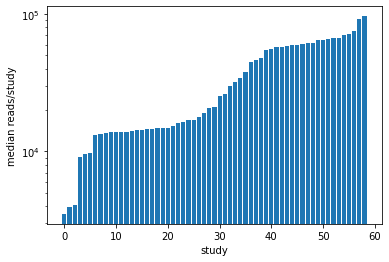

In [46]:
df=df.sort_values('median')
f=plt.figure()
plt.bar(np.arange(len(df)),df['median'])
plt.yscale('log')
plt.ylabel('median reads/study')
plt.xlabel('study')
pass

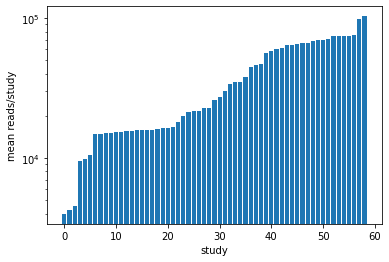

In [47]:
df=df.sort_values('mean')
f=plt.figure()
plt.bar(np.arange(len(df)),df['mean'])
plt.yscale('log')
plt.ylabel('mean reads/study')
plt.xlabel('study')
pass

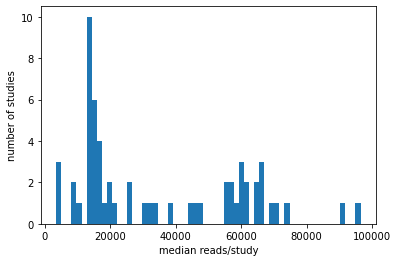

In [48]:
plt.figure()
plt.hist(df['median'],60)
plt.xlabel('median reads/study')
plt.ylabel('number of studies')
pass

In [50]:
df=df.sort_values('median')
df

,Unnamed: 0,cohort,mean,median,std,num_samples,num_HC,num_disease
11,11,../studies/20,4507.019868,3500.0,7135.691770,151,131,20
22,22,../studies/28,3973.933333,3948.0,1805.658063,135,67,68
13,13,../studies/27,4218.570815,4075.0,1965.887273,233,64,169
48,48,../studies/3,9560.985030,9049.5,3848.984245,334,133,201
28,28,../studies/8,10506.363636,9562.0,5866.466320,33,11,22
2,2,../studies/50,9804.758621,9791.5,2353.132383,58,31,27
50,50,../studies/49,14866.159696,13099.0,10890.442800,263,168,95
20,20,../studies/45,15510.144775,13368.0,10153.029781,1043,655,388
52,52,../studies/47,16411.473684,13559.0,10473.071327,247,152,95
41,41,../studies/46,15024.539711,13785.5,8431.800026,554,357,197


## Choose the rarefaction depth to work with

In [64]:
df=df.sort_values('num_rare_4000')
df

,Unnamed: 0,cohort,mean,median,std,num_samples,num_HC,num_disease,num_rare_1000,num_rare_4000,num_rare_7500,num_rare_10000
32,32,../studies/36,15094.933333,14835.0,7205.406345,15,9,6,15,15,14,11
44,44,../studies/24,34800.680000,32161.0,20214.127099,25,10,15,25,24,22,22
39,39,../studies/52,64396.700000,59882.5,22467.919514,30,17,13,30,30,30,30
54,54,../studies/13,27158.935484,25961.0,4378.506204,31,17,14,31,31,31,31
28,28,../studies/8,10506.363636,9562.0,5866.466320,33,11,22,33,32,24,14
9,9,../studies/34,71274.656250,74700.0,36086.984647,32,14,18,32,32,32,32
1,1,../studies/59,64756.242424,54688.0,31807.621428,33,16,17,33,33,33,33
24,24,../studies/1,21809.973684,17052.5,11848.359714,38,20,18,38,38,38,36
0,0,../studies/61,64288.878049,57280.0,35800.442909,41,21,20,41,41,41,41
4,4,../studies/32,103110.627907,91547.0,41200.628633,43,13,30,43,43,43,43


## We choose 4000 as in 7500 we lose 2 studies